# STA365 HW1


**Q1:**

$P(Pass)=0.9$

$P(Quick|Pass)=0.6$

$P(Quick|Fail)=0.3$


$P(Quick)=P(Quick|Pass)P(Pass)+P(Quick|Fail)P(Fail)$

$P(Quick)=0.6(0.9)+0.3(1-0.9)$

$P(Quick)=0.57$


**Q2:**

Likelihood:$p(x|\theta.n)=\frac{n!}{x_1!x_2!\ldots x_k!} \prod_{i=1}^{k} \theta_i^{x_i}$, where k represents the number of mutually exclusive events

Prior distribution: $p(\theta|\alpha)=\frac{1}{B(\alpha)}\prod_{i=1}^{k} \theta_i^{\alpha_i-1}$, where $B(\alpha)$ is a normalizing constant

Posterior Distribution: 

$p(\theta|x,n,\alpha)\propto p(x|\theta,n) \times p(\theta|\alpha)$

$p(\theta|x,n,\alpha) \propto \prod_{i=1}^{k} \theta_i^{x_i} \times \prod_{i=1}^{k} \theta_i^{\alpha_i-1}$

$p(\theta|x,n,\alpha) \propto \prod_{i=1}^{k} \theta_i^{x_i+\alpha_i-1}$

Hence,the posterior distribution is a Dirichlet distribution with parameter $x+\alpha$

**Q3:**

First, create a sample from a three-category multinomial distribution. Set the number of trials as 100 and the probability of each category as 0.1, 0.3 and 0.6 respectively

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

n = 100
theta = [0.1,0.3,0.6]
sample = np.random.multinomial(n,theta)
print("Multinomial Sample:", sample)

Multinomial Sample: [11 29 60]


Next, visualize the multinomial distribution and the multinomial sample using a bar chart.

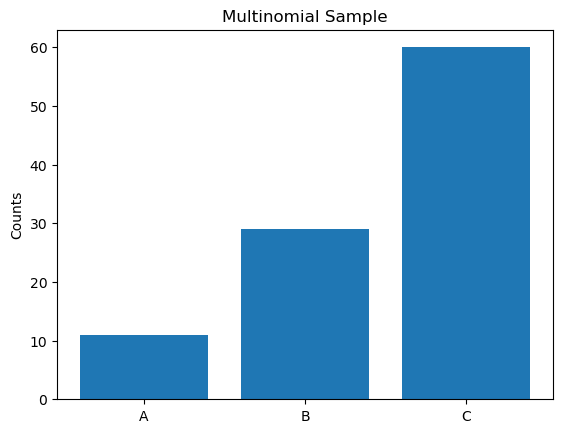

In [5]:
bar_label = ['A', 'B', 'C']
plt.bar(bar_label, sample)
plt.title('Multinomial Sample')
plt.ylabel('Counts')
plt.show()

Now generate the prior Dirichlet distribution and visualize it with a ternary plot. Let the parameter be (1.1, 1.1, 1.1)

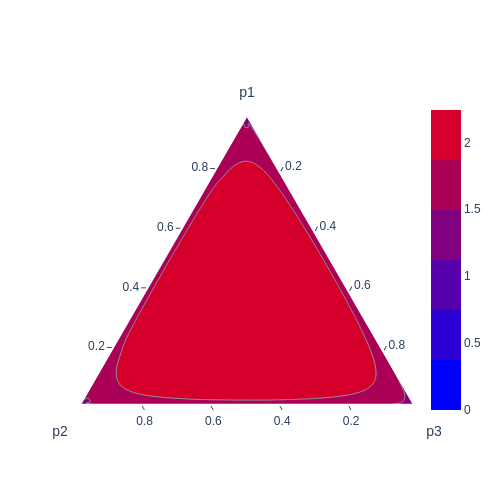

In [22]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff


p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.1, 1.1, 1.1]) 
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)
fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')

Then generate the posterior distribution. The parameter for the posterior distribution is the sum of the alpha for the prior distribution and the multinomial sample counts. The posterior distribution is also visualized with a ternary plot.

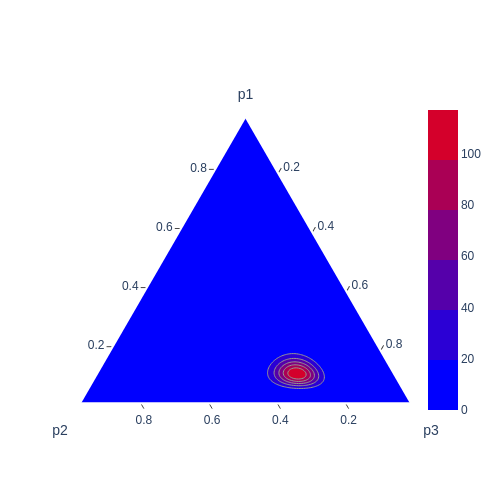

In [23]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff


p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_posterior = np.array([1.1, 1.1, 1.1]+sample) 
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)
fig = ff.create_ternary_contour(p.T, dirichlet_posterior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')